The practise of offering or recommending commodities, products, or services to people based on their interests or preferences is referred to as recommendation. To assist consumers in discovering relevant and entertaining material, recommendation systems are extensively utilised in e-commerce, entertainment, social media, and many other sectors.<br>
There are several types of recommendation systems, but the following are the most common:<br>
+ *Collaborative filtering.*
+ *Content-based filtering.*
+ *Hybrid recommendation.*<br>
In this project, we mainly focused on Collaborative filtering<br>
**Collaborative filtering** is a form of recommendation system in which users collaborate or work together to locate items of interest. In other words, it is a strategy for predicting a user's preferences based on the preferences of other users who have similar interests to them.<br>

The system takes data on prior user activity, such as things purchased, reviewed, or seen, and utilises this information to offer suggestions for similar items that the user may also like. The theory is that if two customers had similar preferences in the past, they will most likely have similar choices in the future.
<br>
Collaborative filtering is classified into two types: 
+ user-based and item-based. User-based collaborative filtering seeks for other users who share the user's interests and recommends items that they have enjoyed. 
+ Item-based collaborative filtering, on the other hand, seeks for and suggests goods that are comparable to those that the user has previously enjoyed.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
books = pd.read_csv('/Users/tarakram/Documents/spotify_genere_prediction/Book_recommendation/Data/Books.csv')
ratings = pd.read_csv('/Users/tarakram/Documents/spotify_genere_prediction/Book_recommendation/Data/Ratings.csv')
users = pd.read_csv('/Users/tarakram/Documents/spotify_genere_prediction/Book_recommendation/Data/Users.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Understand the Data <br>
+ ISBN - International Standard Book Number, is a unique number that is assigned to every published book
+ Book-title - Title of the book
+ Book_Author - Author of the book
+ Year-of-Publication - In which the particular book had published.
+ publisher - by which company the book has been publoshsed.
+ Image-URL-S - image url (small)
+ Imgae-URL-M - image url (Medium)
+ Imgae-URL-L - image url (Large)

In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Understand the Data<br>
+ User-ID - the Id of the particular Reader
+ ISBN - International Standard Book Number, is a unique number that is assigned to every published book
+ Book-rating - Rating of particular book that has been ratede by the user.

In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Understand the Data<br>
+ User-ID - Id of the particular user.
+ Location - the location of the user(reader of the book)
+ Age - Age of the user (reader of the book)

In [6]:
print(f'There are {books.shape[0]} rows and {books.shape[1]} columns in the Books Dataset.')
print(f'There are {ratings.shape[0]} rows and {ratings.shape[1]} columns in the ratings Dataset.')

print(f'There are {users.shape[0]} rows and {users.shape[1]} columns in the users Dataset.')


There are 271360 rows and 8 columns in the Books Dataset.
There are 1149780 rows and 3 columns in the ratings Dataset.
There are 278858 rows and 3 columns in the users Dataset.


### Data cleaning

In [7]:
# we can clearly see that we have imbalanced data.

In [8]:
# first we have to remove the missing values, and noise of the data, before we merge them.

In [9]:
books.isnull().sum() # We can see few missing values

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
books.dropna(inplace = True) # Removing duplicates

In [11]:
books.duplicated().sum() # we don't have any duplicate values

0

In [12]:
ratings.isnull().sum() # no missing values

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
ratings.duplicated().sum() # we don't have any duplicate values

0

In [14]:
users.isnull().sum() # Have lot of missing values in Age.

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
users['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0          NaN
1         18.0
2          NaN
3         17.0
4          NaN
          ... 
278853     NaN
278854    50.0
278855     NaN
278856     NaN
278857     NaN
Name: Age, Length: 278858, dtype: float64>

In [16]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [17]:
# there are outliers in our data, the age is 244 is not possible, and the 0 is not possible.
# we wanted to build a general model so we remove those outliers and fill the nan values with mean.

In [18]:
age_mean = users['Age'].mean()
age_std = users['Age'].std()

In [19]:
lower_bound = age_mean - 3*age_std
upper_bound = age_mean + 3*age_std

In [20]:
users = users[(users['Age'] > lower_bound) & (users['Age'] <upper_bound)].reset_index(drop=True)


In [21]:
users['Age'].describe()

count    167400.000000
mean         34.470723
std          13.651683
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          78.000000
Name: Age, dtype: float64

In [22]:
# we have cleaned our data,
#but still there is a problem that the min age is 0, I want to remove the age lessthan 7 years, generally childrens less then 7 years wont read books

In [23]:
def remove_age_less_than_7(df):
    age = df['Age'] >= 7
    return df[age]
# Remove rows where Age is less than 7 using the function
users = remove_age_less_than_7(users)
users# printing the Dataframe

,User-ID,Location,Age
0,2,"stockton, california, usa",18.0
1,4,"porto, v.n.gaia, portugal",17.0
2,6,"santa monica, california, usa",61.0
3,10,"albacete, wisconsin, spain",26.0
4,11,"melbourne, victoria, australia",14.0
...,...,...,...
167395,278849,"georgetown, ontario, canada",23.0
167396,278851,"dallas, texas, usa",33.0
167397,278852,"brisbane, queensland, australia",32.0
167398,278853,"stranraer, n/a, united kingdom",17.0


In [24]:
users['Age'].describe()

count    166474.000000
mean         34.656559
std          13.459235
min           7.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          78.000000
Name: Age, dtype: float64

In [25]:
# Now the users Dataframe is good

Merging the Dataframes into one to perform our tasks

In [26]:
data = users.merge(ratings, on = 'User-ID')

In [27]:
data.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,10,"albacete, wisconsin, spain",26.0,1841721522,0
2,10,"albacete, wisconsin, spain",26.0,8477024456,6
3,19,"weston, ,",14.0,0375759778,7
4,20,"langhorne, pennsylvania, usa",19.0,0425163091,0


In [28]:
# Location doesn't add any value to the book recommendation, so we can remove it 

In [29]:
data.drop('Location', axis = 1, inplace = True)

In [30]:
data.head()

,User-ID,Age,ISBN,Book-Rating
0,2,18.0,0195153448,0
1,10,26.0,1841721522,0
2,10,26.0,8477024456,6
3,19,14.0,0375759778,7
4,20,19.0,0425163091,0


In [31]:
# now we want to merge the dataframe based on the ISBN to the books Dataframe.

In [32]:
books = books.merge(data, on = 'ISBN')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,49.0,0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,30.0,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,36.0,0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,96054,29.0,0


In [33]:
books.shape

(747235, 11)

In [34]:
# Now we can remove those links, because we are not deploything this model.


In [35]:
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis = 1, inplace = True)

In [36]:
books.head() # Now our Final Dataframe is Ready

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,49.0,0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,30.0,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526,36.0,0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,96054,29.0,0


In [37]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Age                    0
Book-Rating            0
dtype: int64

### Exploratory data analysis (EDA)

In [38]:
# we can plot some of the graphs to understand the data, much better.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
Age = books['Age']
Book_Rating = books['Book-Rating']
Book_Title = books['Book-Title']
Publisher = books['Publisher']

Text(0, 0.5, 'Book Rating')

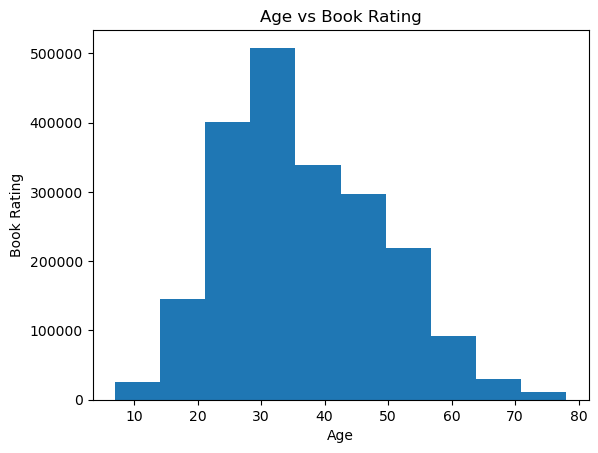

In [41]:
plt.hist(x=Age, weights=Book_Rating, bins=10, align='mid')
plt.title('Age vs Book Rating')
plt.xlabel('Age')
plt.ylabel('Book Rating')

In [42]:
# I want to find top 5 publisher has higest rating.
avg_ratings = books.groupby('Publisher')['Book-Rating'].mean().sort_values(ascending = False)[:5]
print("These are the top 5 publishers with the highest average rating:")
for i, publisher in enumerate(avg_ratings.index, start=1):
    print(f'{i}. {publisher}: {avg_ratings[publisher]:.2f}')


These are the top 5 publishers with the highest average rating:
1.  Editions P. Terrail: 10.00
2. Unicorn Pub. House: 10.00
3. Ulmer (Eugen): 10.00
4. Ediciones Zarebska: 10.00
5. Ediciones Torremozas: 10.00


In [43]:
# I want to find the top 5 rating books.
book_ratings = books.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)[:5]

# Print the top books with their average rating
print("These are the top 5 books with the highest average rating:")
for i, book_title in enumerate(book_ratings.index, start=1):
    print(f'{i}. {book_title}: {book_ratings[book_title]:.2f}')


These are the top 5 books with the highest average rating:
1. The Mountains of California (Modern Library Classics): 10.00
2. Keane: 10.00
3. Marconi's Atlantic Leap: 10.00
4. One pot meals: 10.00
5. Baubles, Buttons and Beads: The Heritage of Bohemia: 10.00


In [44]:
# I want to fing the top 5 authors having highest rating.
Author_ratings = books.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False)[:5]

# Print the top books with their average rating
print("These are the top 5 Authors with the highest average rating:")
for i, book_Author in enumerate(Author_ratings.index, start=1):
    print(f'{i}. {book_Author}: {Author_ratings[book_Author]:.2f}')

These are the top 5 Authors with the highest average rating:
1. Lee Silber: 10.00
2. Elizabeth Zimmermann: 10.00
3. J. A. MacCulloch: 10.00
4. Elizabeth Watson: 10.00
5. Susan Washburn Buckley: 10.00


### popularity_Based_Recommendation

Since, We have Rating column, so we can build the popularity Recommendation

In [45]:
num_rating = books.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns = { 'Book-Rating' : 'num_Rating'}, inplace = True)
num_rating

,Book-Title,num_Rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Dark Justice,1
...,...,...
204143,Ã?Â?lpiraten.,1
204144,Ã?Â?rger mit Produkt X. Roman.,4
204145,Ã?Â?sterlich leben.,1
204146,Ã?Â?stlich der Berge.,3


In [46]:
# Here are gouping the two datasets on the name of the book-rating, and we are addingt the mean of the rating.
avg_rating = books.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns = { 'Book-Rating' : 'Avg_Rating'}, inplace = True)
avg_rating

,Book-Title,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,0.000000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Dark Justice,10.000000
...,...,...
204143,Ã?Â?lpiraten.,0.000000
204144,Ã?Â?rger mit Produkt X. Roman.,5.250000
204145,Ã?Â?sterlich leben.,7.000000
204146,Ã?Â?stlich der Berge.,2.666667


In [47]:
# Merging the Data frames, on book-title
pop_df = num_rating.merge(avg_rating, on = 'Book-Title')
pop_df

,Book-Title,num_Rating,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,1,0.000000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Dark Justice,1,10.000000
...,...,...,...
204143,Ã?Â?lpiraten.,1,0.000000
204144,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
204145,Ã?Â?sterlich leben.,1,7.000000
204146,Ã?Â?stlich der Berge.,3,2.666667


here is the main part, we are taking the num_ratings >= 100, which means we are taking only users that has rated atleat 100 books. so that we can Recommend based on the all users on a Average.


In [48]:
pop_df = pop_df[pop_df['num_Rating'] >= 100].sort_values('Avg_Rating', ascending = False).head(100)
pop_df.shape

(100, 3)

In [49]:
# Merging into our Main DataFrame
data = pop_df.merge(books, on = 'Book-Title').drop_duplicates('Book-Title')
data.head(2)

,Book-Title,num_Rating,Avg_Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Book-Rating
0,Harry Potter and the Sorcerer's Stone (Book 1),212,6.023585,0590353403,J. K. Rowling,1998,Scholastic,254,24.0,9
212,Harry Potter and the Goblet of Fire (Book 4),291,5.945017,0439139597,J. K. Rowling,2000,Scholastic,254,24.0,9


In [50]:
# to make it simple, I am only keeping the book_title, author, num_ratings and avg_rating.
Pop_data = data[['Book-Title','Book-Author','num_Rating','Avg_Rating']]
Pop_data.head()

,Book-Title,Book-Author,num_Rating,Avg_Rating
0,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,212,6.023585
212,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,291,5.945017
503,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,330,5.936364
833,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,290,5.724138
1123,The Little Prince,Antoine de Saint-ExupÃ©ry,103,5.631068


In [51]:
# these are the top 50 popular books
Pop_data.head(50)

,Book-Title,Book-Author,num_Rating,Avg_Rating
0,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,212,6.023585
212,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,291,5.945017
503,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,330,5.936364
833,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,290,5.724138
1123,The Little Prince,Antoine de Saint-ExupÃ©ry,103,5.631068
1226,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,171,5.362573
1397,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,421,5.130641
1818,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,272,5.022059
2090,Ishmael: An Adventure of the Mind and Spirit,Daniel Quinn,110,4.927273
2200,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,208,4.865385


In [52]:
# this whole can be done in this small function.

In [53]:
def get_top_books(data, input_book):
    # Get the average rating of the input book
    input_rating = data.loc[data['Book-Title'] == input_book, 'Avg_Rating'].iloc[0]

    # Filter the books that have similar average rating as the input book
    filtered_books = data[(data.groupby('Book-Title')['Avg_Rating'].transform('mean') >= input_rating - 1) & (data.groupby('Book-Title')['Avg_Rating'].transform('mean') <= input_rating + 1)]

    # Sort the filtered books in descending order of average rating
    sorted_books = filtered_books.sort_values('Avg_Rating', ascending=False)

    # Select the top 5 recommended books
    recommended_books = sorted_books.head(5)

    # Create a list of recommended books with their details
    books_list = []
    for i, book in recommended_books.iterrows():
        book_details = f"{book['Book-Title']} by {book['Book-Author']} with average rating {book['Avg_Rating']:.1f}"
        books_list.append(book_details)

    return books_list


In [54]:
input_book = input("Enter a book title: ")
recommended_books = get_top_books(data, input_book)
print(f"The 5 recommended books based on '{input_book}' are:")
for i, book in enumerate(recommended_books):
    print(f"{i+1}. {book}")
    print('----------')


Enter a book title: The Little Prince
The 5 recommended books based on 'The Little Prince' are:
1. Harry Potter and the Sorcerer's Stone (Book 1) by J. K. Rowling with average rating 6.0
----------
2. Harry Potter and the Goblet of Fire (Book 4) by J. K. Rowling with average rating 5.9
----------
3. Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling with average rating 5.9
----------
4. Harry Potter and the Order of the Phoenix (Book 5) by J. K. Rowling with average rating 5.7
----------
5. The Little Prince by Antoine de Saint-ExupÃ©ry with average rating 5.6
----------


### Collaborative Recommendation

In [55]:
# now comes the main part, which is Collaborative filtering, which gives recommedation from the users experience.


In [56]:
books.head() # this is our Dataset.

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,49.0,0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,30.0,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526,36.0,0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,96054,29.0,0


In [57]:
books.groupby('User-ID').count()['Book-Rating']
# this is the information that particular user rates how many Books.

User-ID
2          1
10         1
19         1
20         1
36         1
          ..
278844     2
278846     1
278849     4
278851    23
278852     1
Name: Book-Rating, Length: 53362, dtype: int64

We want to make a General and a good model, so We only consider the users who have rated atleast 100 books.

In [58]:
rate_users = books.groupby('User-ID').count()['Book-Rating'] >100
good_users = rate_users[rate_users].index


In [59]:
filtered_users = books[books['User-ID'].isin(good_users)]
filtered_users.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526,36.0,0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,96054,29.0,0


In [60]:
rating_users = filtered_users.groupby('Book-Title').count()['Book-Rating']>30
top_books = rating_users[rating_users].index



In [61]:
final_ratings = filtered_users[filtered_users['Book-Title'].isin(top_books)]
final_ratings.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Age,Book-Rating
17,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526,26.0,9
18,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,36836,56.0,0


In [62]:
final_ratings.isnull().sum() # checking for null values

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Age                    0
Book-Rating            0
dtype: int64

In [63]:
final_ratings.duplicated().sum() # checking for duplicate values

0

In [64]:
# there are no null values, and duplicate values

In [65]:
pivot_table = final_ratings.pivot_table(index ='Book-Title', columns ='User-ID', values = 'Book-Rating')
pivot_table.head(4)

User-ID,254,882,1435,1733,1903,2033,2276,2358,2766,2977,...,274308,274808,275970,276463,276680,277427,277478,277639,278137,278188
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# there are 1509 books and 1279 users

In [67]:
pivot_table.fillna(0, inplace = True)

In [68]:
pivot_table.head(3)

User-ID,254,882,1435,1733,1903,2033,2276,2358,2766,2977,...,274308,274808,275970,276463,276680,277427,277478,277639,278137,278188
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
pivot_table.shape


(1509, 1279)

 Now our each book is a vector, which means each book has 1279 values in their vectors, all are converted into vectors, and then through the help of the vectors, we find the similar vectors(books), by calculating the eucledian distance.

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
similarity_scores = cosine_similarity(pivot_table) # calling them as a similarity scores

In [72]:
similarity_scores.shape

(1509, 1509)

In [73]:
# defining a function that takes book_name as a input and give the most similar books.
def recommend(book_name):
    index = np.where(pivot_table.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    for i, index in enumerate(similar_items, start=1):
        Book_title = pivot_table.index[index[0]]
        print(f"{i}. {Book_title}")
        print('--')


In [74]:
# Let's test it

In [75]:
recommend('1984')

1. Animal Farm
--
2. Waiting
--
3. Brave New World
--
4. Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
--
5. Roll of Thunder, Hear My Cry
--


In [76]:
recommend("The Kitchen God's Wife") # another one

1. The Bonesetter's Daughter
--
2. The Handmaid's Tale
--
3. The Hundred Secret Senses
--
4. The Joy Luck Club
--
5. The True Confessions of Charlotte Doyle (rack)
--


In [77]:
recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

1. Harry Potter and the Goblet of Fire (Book 4)
--
2. Harry Potter and the Chamber of Secrets (Book 2)
--
3. Harry Potter and the Order of the Phoenix (Book 5)
--
4. Harry Potter and the Sorcerer's Stone (Book 1)
--
5. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
--


**Our model is working pretty well !**

Future work <br>
+ Deploy the model into production.
+ Use different approches to find the similarity.


